In [ ]:
%run -i train_bnn.ipynb
from sklearn import metrics

In [ ]:

def set_out_filename(filename):
    global out_filename
    out_filename = filename
    with open(out_filename+".txt", "w") as text_file:
        text_file.write("# \n" )

def save_log_to_filename():
    with open(out_filename+ '.txt', "ab") as f:
        np.savetxt(f, np.array([logs['tlos']]))
        #f.write(b"\n")

# experiment with 10 layers

In [ ]:
####
set_up_data('all')        # number of input features
# num_batches_to_run = 66
# selected_to_train = 22   ### "batch size"
num_batches_to_run = 32
selected_to_train = 16   ### "batch size"
num_classes = 2         # binary classification
input_size = sum(select)
hidden_n = 128   # size of hidden layer

n_layers = 10      # number of hidden layers
model = BinaryNet()

criterion = torch.nn.BCEWithLogitsLoss()


In [ ]:
model

BinaryNet(
  (fc_list): ModuleList(
    (0): BinaryLinear(in_features=123, out_features=128, bias=False)
    (1): BinaryLinear(in_features=128, out_features=128, bias=False)
    (2): BinaryLinear(in_features=128, out_features=128, bias=False)
    (3): BinaryLinear(in_features=128, out_features=128, bias=False)
    (4): BinaryLinear(in_features=128, out_features=128, bias=False)
    (5): BinaryLinear(in_features=128, out_features=128, bias=False)
    (6): BinaryLinear(in_features=128, out_features=128, bias=False)
    (7): BinaryLinear(in_features=128, out_features=128, bias=False)
    (8): BinaryLinear(in_features=128, out_features=128, bias=False)
    (9): BinaryLinear(in_features=128, out_features=1, bias=False)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (activation): BinaryTanh(
    (hardtanh): Hardtanh(min_val=-1.001, max_val=1.001)
  )
)

In [ ]:
class Args():
    epochs = 2    
    log_interval = 1
    learning_rate = 0.1

args = Args()


In [ ]:
%%time

set_out_filename('5layers_signsgd')
args.learning_rate = 0.02
plt.figure()
avg_logs = None 
logs_count = 0
signsgd_ls = []
for exp in range(5):
    torch.random.manual_seed(exp+ 5)
    model = BinaryNet()
    Train(update_type='signsgd')
    plt.plot(logs['tlos'], alpha=0.2)
    save_log_to_filename()
    if exp == 0:
        avg_logs = np.array(logs['tlos'])
    else:
        avg_logs += np.array(logs['tlos'])
    logs_count += 1
    signsgd_ls.append(np.array(logs['tlos']))
    ls_same = logs['diff']
    ls_total = logs['diff_sum']
    same = sum(ls_same)
    total = sum(ls_total)


avg_logs /= logs_count
plt.plot(avg_logs, '-k')

plt.ylabel('loss')
plt.xlabel('iteration')


In [ ]:
arr_signsgd = np.stack(signsgd_ls)
with open('sign_sgd.npy', 'wb') as f:
    np.save(f, arr_signsgd)

In [ ]:
%%time

set_out_filename('2layers_qcbo')

args.learning_rate = 0.1


plt.figure()
avg_logs = None 
logs_count = 0
gurobi_ls = []
for exp in range(5):
    torch.random.manual_seed(exp+ 5)
    model = BinaryNet()

    Train(update_type='qubo')

    gurobi_ls.append(np.array(logs['tlos']))
    ls_same = logs['diff']
    ls_total = logs['diff_sum']
   

In [ ]:
%%time

set_out_filename('2layers_sgd')

args.learning_rate = 0.01
args.learning_rate = 0.01

plt.figure()
avg_logs = None 
logs_count = 0
sgd_ls = []
for exp in range(5):
    torch.random.manual_seed(exp+ 5)
    model = BinaryNet()
    Train()
   
    sgd_ls.append(np.array(logs['tlos']))
   

In [ ]:
set_out_filename('2layers_sgd')

args.learning_rate = 0.5
args.learning_rate = 0.1

plt.figure()
avg_logs = None 
logs_count = 0
prox_ls = []
for exp in range(5):
    torch.random.manual_seed(exp+ 5)
    model = BinaryNetProxQuant()

    Train(update_type = "proxquant")
   
    prox_ls.append(np.array(logs['tlos']))


In [ ]:
np.save('gurobi.npy', arr_gurobi)
np.save('sgd.npy', arr_sgd)
np.save('signsgd.npy', arr_signsgd)

In [3]:
arr_gurobi = np.load('gurobi.npy')
arr_sgd = np.load('sgd.npy')
arr_signsgd = np.load('signsgd.npy')

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d

arr_mean_gurobi = np.mean(arr_gurobi, axis=0)
arr_max_gurobi = np.max(arr_gurobi, axis=0)
arr_min_gurobi = np.min(arr_gurobi, axis=0)
arr_mean_gurobi = gaussian_filter1d(arr_mean_gurobi, sigma=1)
arr_max_gurobi = gaussian_filter1d(arr_max_gurobi, sigma=1)
arr_min_gurobi = gaussian_filter1d(arr_min_gurobi, sigma=1)

In [5]:
arr_mean_sgd = np.mean(arr_sgd, axis=0)
arr_max_sgd = np.max(arr_sgd, axis=0)
arr_min_sgd = np.min(arr_sgd, axis=0)

arr_mean_sgd = gaussian_filter1d(arr_mean_sgd, sigma=1)
arr_max_sgd = gaussian_filter1d(arr_max_sgd, sigma=1)
arr_min_sgd = gaussian_filter1d(arr_min_sgd, sigma=1)

In [6]:
arr_mean_signsgd = np.mean(arr_signsgd, axis=0)
arr_max_signsgd = np.max(arr_signsgd, axis=0)
arr_min_signsgd = np.min(arr_signsgd, axis=0)

arr_mean_signsgd = gaussian_filter1d(arr_mean_signsgd, sigma=1)
arr_max_signsgd = gaussian_filter1d(arr_max_signsgd, sigma=1)
arr_min_signsgd = gaussian_filter1d(arr_min_signsgd, sigma=1)

In [56]:
arr_prox = np.stack(prox_ls)
arr_mean_prox = np.mean(arr_prox, axis=0)
arr_max_prox = np.max(arr_prox, axis=0)
arr_min_prox = np.min(arr_prox, axis=0)

arr_mean_prox = gaussian_filter1d(arr_mean_prox, sigma=1)
arr_max_prox = gaussian_filter1d(arr_max_prox, sigma=1)
arr_min_prox = gaussian_filter1d(arr_min_prox, sigma=1)

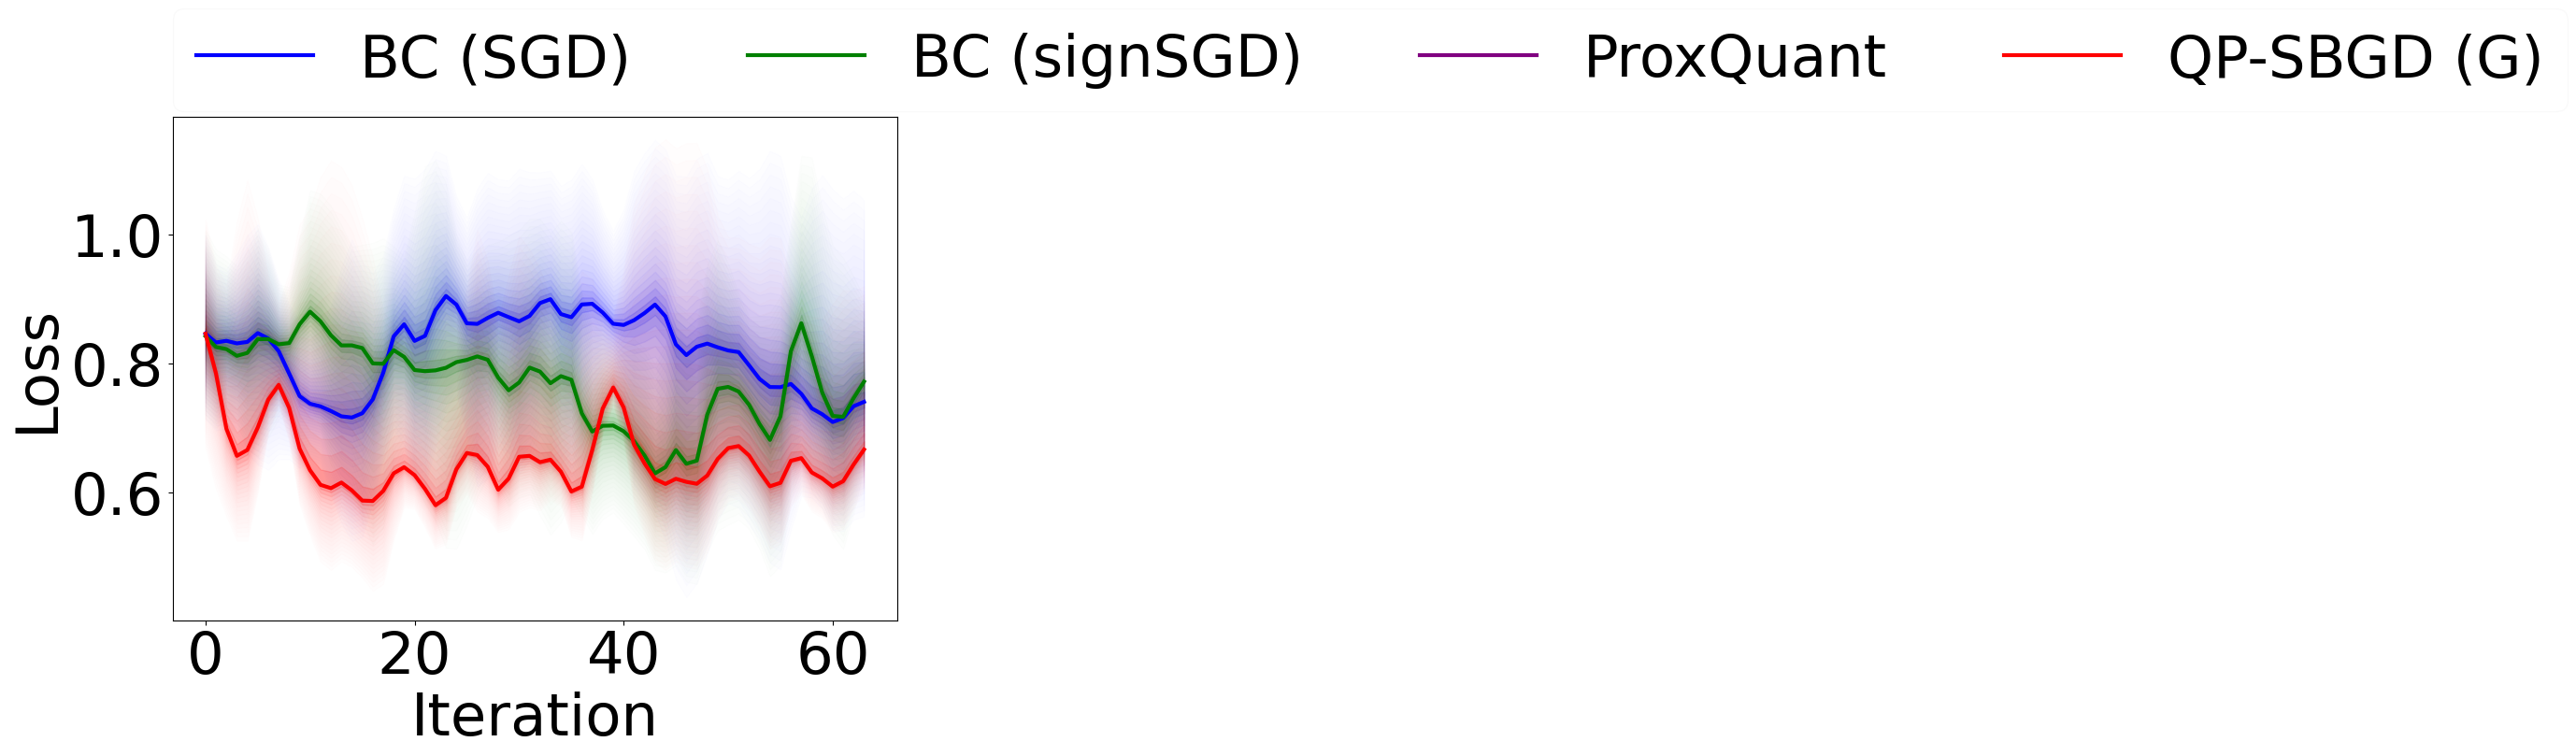

In [17]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 45})

eightyfive = 83
grad = 20
x = range(arr_min_signsgd.shape[0])

from matplotlib.lines import Line2D


plt.plot(x[:eightyfive], arr_mean_sgd[:eightyfive], c = 'blue', label="BC (SGD)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_sgd[:eightyfive] - arr_min_sgd[:eightyfive]
    dist_2 = arr_max_sgd[:eightyfive] - arr_mean_sgd[:eightyfive]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:eightyfive], arr_mean_sgd[:eightyfive] - dist_1, arr_mean_sgd[:eightyfive] + dist_2, color='blue', alpha=1 /(8*i))

plt.plot(x[:eightyfive], arr_mean_signsgd[:eightyfive], c = 'green', label="BC (signSGD)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_signsgd[:eightyfive] - arr_min_signsgd[:eightyfive]
    dist_2 = arr_max_signsgd[:eightyfive] - arr_mean_signsgd[:eightyfive]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:eightyfive], arr_mean_signsgd[:eightyfive] - dist_1, arr_mean_signsgd[:eightyfive] + dist_2, color='green', alpha=1 /(8*i))


line = Line2D([0], [0], label='ProxQuant', color='purple', lw = 3)


plt.plot(x[:eightyfive], arr_mean_gurobi[:eightyfive], c = 'red', label="QP-SBGD (G)", lw = 3)
for i in range(1, grad + 1):
    dist_1 = arr_mean_gurobi[:eightyfive] - arr_min_gurobi[:eightyfive]
    dist_2 = arr_max_gurobi[:eightyfive] - arr_mean_gurobi[:eightyfive]
    dist_1 *= i/grad
    dist_2 *= i/grad
    plt.fill_between(x[:eightyfive], arr_mean_gurobi[:eightyfive] - dist_1, arr_mean_gurobi[:eightyfive] + dist_2, color='red', alpha=1 /(8*i))


handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([line])
handles[2], handles[3] = handles[3], handles[2]

plt.legend(handles=handles, framealpha = 0.1, loc=(-0., 1.01), ncol = 4)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.savefig('5layer_sign_loss_bigger_font.pdf', bbox_inches="tight")
plt.show()